# 1.20
Az ábrán látható befogott, tömör kör keresztmetszetű alumínium tengelyre két koncentrált erő hat.
- Határozzuk meg a befogásokban ébredő reakciónyomatékokat
- Méretezzük a tengelyt, ha $\tau_{\rm meg}=100 \, \rm{MPa}$
- Határozzuk meg a $\rm{C}$ keresztmetszet $\rm{A}$-hoz képesti elcsavarodási szögét
<img src="./Fig_1.20.PNG" style="width: 300px;">

## Megoldás
Első lépésként importáljuk a szimbolikus számításhoz szükséges modult, és felvesszük a megadott adatokat.

In [1]:
import sympy as sp
sp.init_printing()

M_A, M_B, I_p, d_min = sp.symbols('M_A,M_B,I_p,d_min')

# Adatok
E = 70e3    #MPa
ν = 0.34    #[-] (\nu)
L_1 = 400   #mm
L_2 = 600   #mm
F = 3e3     #N
τ_meg = 100 #MPa

# A csavaró rugalmassági moduluszra is szükségünk lesz
G = E/(2*(1+ν))

# 'round()' magyarázatát lásd a notebook végén
round(G) #MPa

A reakciónyomatékok meghatározásához rajzoljuk fel a szerkezetre ható nyomatékokat.
<img src="./Fig_1.20.1.JPG" style="width: 300px;">

In [2]:
M_1 = 50*F + 50*F
M_1 #Nmm

A reakciónyomatékok meghatározásához ismerjük fel, hogy a befogásoknál a keresztmetszetek elcsavarodási szöge zérus. Ezt felhasználva felírhatunk egy alakváltozási feltételt a $\rm{B}$ keresztmetszetre:
$$\frac{M_{\rm A}L_1}{I_{\rm p}G}+\frac{(M_{\rm A}+M_1)L_2}{I_{\rm p}G}=0.$$

In [3]:
# Írjuk fel a fenti egyenlet bal oldalát az 'egyenlet' változóban.
egyenlet = ((M_A*L_1)/(I_p*G) + (M_A+M_1)*L_2/(I_p*G))

# Tároljuk el az egyenlet megoldását a 'sol' változóban
sol = sp.solve(egyenlet, M_A)
# Az eredményt egy 'list' objektumban kapjuk, aminek több eleme lenne, ha az egyenletünknek 1-nél több gyöke lenne.

# 'M_An' legyen egyenlő a 'sol' nevű list első elemével:
M_An = sol[0]

M_An.evalf(4) #Nmm

Mivel a szerkezet egyensúlyban van, ezért: $$M_{\rm B}+M_{\rm A}+M_1=0.$$

In [4]:
# Írjuk fel a fenti egyenlet bal oldalát az 'egyenlet2' változóban.
egyenlet2 = M_B + M_A + M_1

sol2 = sp.solve(egyenlet2, M_B) # Megoldjuk 'M_B'-re

M_Bn = sol2[0].subs(M_A,M_An)

M_Bn.evalf(4) #Nmm

Az igénybevételi ábra:
<img src="./Fig_1.20.2.JPG" style="width: 400px;">
A minimális tengelyvastagság meghatározásához felírhatjuk a kritikus keresztmetszet megfelelőségi kritériumát, miszerint:
$$\frac{M_{\rm{cs,max}}}{K_{\rm p}}=\tau_{\rm {meg}},$$
ahol:
$$K_{\rm p}=\frac{d_{\rm {min}}^3\pi}{16}.$$

In [5]:
# A maximális csavaró nyomaték a rúdban:
M_cs_max = abs(M_An)

# Írjuk fel a fenti 2 egyenletet:
K_p = d_min**3*sp.pi/16
egyenlet3 = M_cs_max/K_p - τ_meg

# Megj.: Vegyük észre, hogy a szimbolikus megoldó tudja kezelni az egymásba láncolt egyenleteket.
#        Nem kellett a 'K_p'-t kézzel behelyettesítenünk a megfelelőségi egyenletbe! Arra figyelni
#        kell, hogy a deklarálási sorrendet betartsuk. Az 'egyenlet3' előtt kell szerepeljen a 'K_p'
#        szimbolikus kifejezés, különben hibát kapunk.

sol3 = sp.solve(egyenlet3, d_min)

# Itt láthatjuk, hogy a 'solve' az összes lehetséges gyököt megtalálja!
display([sol.evalf(5) for sol in sol3])

d_min_n = sol3[0] # Természetesen minket a valós gyök érdekel (a képzetes egységet 'I'-vel jelöli a program).

display(round(d_min_n,5)) #mm

A minimális átmérő ismeretében kiszámolhatjuk a rúd poláris másodrendű nyomatékát, és felírhatjuk a kritikus keresztmetszet szögelcsavarodását.

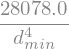

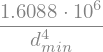

In [6]:
I_p = d_min**4*sp.pi/32
display(I_p.evalf(5)) #mm^4

ϕ_CA = M_cs_max*L_1/(I_p*G)
display(ϕ_CA.evalf(5)) #rad
display((ϕ_CA*180/sp.pi).evalf(5)) #fok

## + Extra a kíváncsiaknak

Felmerülhet az a kérdés, hogy miért használtuk a `round()` metódust a kerekítésekhez, mikor már az előző feladatokban megismerkedtünk az `.evalf()` metódussal. Ha látszólag ugyan hasonló feladatot is lát el a két függvény, vannak közöttük fontos különbségek. <br> 
A változóink deklarálásakor a Python egy osztály elemeként tárolja a változókat (pl: `int`, `float`, `list`...), ami meghatározza azt is, hogy milyen metódusokat ('parancsokat', 'függvényeket') tudunk hívni az adott változón. Ez egy természetes megszorítás, hiszen szeretnénk elkerülni, hogy a programunk logikailag értelmetlen kérdésekre eredményeket adjon. Pl: `round('sziltan') -> !?!?`. Sajnos ennek a problémának a kevésbé egyértelmű esetei változatos hibákat szülhetnek a kódunkban. <br> Nézzük meg, hogy az eddig használt változóink milyen osztályba tartoznak a program szerint:

In [7]:
n = 10
pi_1 = 3.141592653
lista = [1, 2, 3]
konyvtar = {'sziltan': 5, 'matekG2': 4, 'anyagtech': 3}
pi_2 = sp.pi
i = sp.symbols('i')

# Nézzük meg a fenti változók milyen osztályba tartoznak
display(type(n))
display(type(pi_1))
display(type(lista))
display(type(konyvtar))
display(type(pi_2))
display(type(i))

int

float

list

dict

sympy.core.numbers.Pi

sympy.core.symbol.Symbol

Látható, hogy a `sympy` könyvtár függvényeivel létrehozott változóink a `sympy` saját osztályainak az elemei. Ebből már meg lehet sejteni, hogy a Python gyári metódusai nem biztos, hogy ezeket a kiterjesztett osztályokat hiba nélkül tudják kezelni. Nézzünk néhány példát arra, amikor jól működnek a dolgok:

In [8]:
pi_1 = 3.141592653
pi_1_kerek = round(pi_1)
display('Eredeti: '+str(type(pi_1))+' Új: '+str(type(pi_1_kerek)))

pi_2 = sp.pi
pi_2_kerek = pi_2.evalf(5)
display('Eredeti: '+str(type(pi_2))+' Új: '+str(type(pi_2_kerek)))

"Eredeti: <class 'float'> Új: <class 'int'>"

"Eredeti: <class 'sympy.core.numbers.Pi'> Új: <class 'sympy.core.numbers.Float'>"

Látszik, hogy mikor műveleteket végzünk a változóinkon (pl.: kerekítjük őket), akkor azoknak nem csak a numerikus értéke, de a programban tárolt osztálya is változik. Ezt a Python dinamikus változó kezelése teszi lehetővé, ami elég sok átalakítást képes automatikusan elvégezni számunkra. Lássunk egy példát arra amikor ez mégsem működik:

In [9]:
pi_1 = 3.141592653
pi_1.evalf(5)

AttributeError: 'float' object has no attribute 'evalf'

Hibaüzentet kaptunk amikor a saját `float` változónkat próbáltuk -a csak `sympy` osztályok álltal ismert- `.evalf()` metódussal kerekíteni. Az ehhez hasonló hibák összezavaróak lehetnek, hiszen egy logikailag és szemantikailag értelmes parancsunk nem futott le. Ezeknek a kezeléséhez tartsuk észben, hogy a változóink osztálya meghatározza a rajtuk végezhető műveleteket is! 